In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA 

In [95]:
df=pd.read_excel("C:/Users/shiva/Downloads/tech/default_of_credit_card_clients.xls")

In [97]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# BOOLEAN MASKS
np.random.seed(seed=24)
np

In [7]:
random_integers = np.random.randint(low=1,high=5,size=100)

In [11]:
random_integers

array([3, 4, 1, 4, 2, 2, 2, 1, 4, 4, 1, 4, 4, 3, 4, 4, 4, 4, 4, 4, 2, 3,
       4, 4, 2, 4, 2, 4, 1, 1, 3, 1, 4, 2, 2, 1, 4, 3, 2, 2, 3, 3, 2, 3,
       4, 2, 3, 4, 1, 3, 4, 2, 2, 4, 1, 2, 3, 3, 2, 1, 2, 4, 2, 1, 4, 3,
       1, 2, 1, 3, 4, 2, 3, 4, 1, 3, 2, 1, 1, 3, 3, 4, 3, 2, 4, 1, 4, 4,
       4, 4, 1, 4, 3, 2, 4, 4, 3, 3, 2, 4])

In [12]:
is_equal_to_3[:5]

array([ True, False, False, False, False])

In [13]:
sum(is_equal_to_3)

22

In [14]:
random_integers[is_equal_to_3]

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [15]:
id_counts = df['ID'].value_counts()
dupe_mask = id_counts == 2
dupe_mask[0:5]

27e04c06-487f    True
f37328b4-7b3a    True
5f463f95-a4ae    True
64fe3b96-7ed0    True
d50ebd87-8b6d    True
Name: ID, dtype: bool

In [16]:
dupe_ids = id_counts.index[dupe_mask]
dupe_ids = list(dupe_ids)
len(dupe_ids)

313

In [17]:
df.loc[df['ID'].isin(dupe_ids[0:3]),:].head(10) 


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
14525,f37328b4-7b3a,180000,1,2,2,43,0,0,0,0,...,160018,164717,151235,7500,5900,6000,7000,7000,5000,0
14625,f37328b4-7b3a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17523,27e04c06-487f,200000,2,2,1,37,1,2,0,0,...,10155,12470,13571,0,2000,1155,2470,1265,0,0
17623,27e04c06-487f,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20651,5f463f95-a4ae,30000,1,2,1,22,1,2,5,4,...,27120,26154,25940,4311,0,0,0,0,0,1
20751,5f463f95-a4ae,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_zero_mask = df == 0

In [19]:
feature_zero_mask = df_zero_mask.iloc[:,1:].all(axis=1)
sum(feature_zero_mask)

315

In [20]:
df_clean_1 = df.loc[~feature_zero_mask,:].copy()


In [21]:
df_clean_1['ID'].nunique()


29685

In [22]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [23]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [24]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


In [25]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [26]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

In [27]:
df_clean_2['EDUCATION_CAT'] = 'none'

In [28]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [29]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [30]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [31]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)
df_with_ohe.to_csv('cleaned_data.csv', index=False)


In [32]:
%autosave 10

Autosaving every 10 seconds


In [35]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

# EDA

In [36]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [37]:
df.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,165760.989333,1.586500,1.833333,1.535900,35.108800,-0.132867,-0.164333,-0.219300,-0.263900,-0.288033,...,42791.362167,39884.398167,38480.350933,5613.321500,5.855410e+03,5174.387967,4776.089733,4754.749200,5164.223267,0.218733
std,130158.590432,0.513348,0.807699,0.542698,9.851592,1.191215,1.191096,1.162348,1.127519,1.144981,...,64090.316188,60606.644833,59406.836932,16539.094312,2.299256e+04,17565.538305,15532.893047,15239.070708,17712.664703,0.413394
min,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2034.000000,1534.000000,1080.000000,836.000000,7.217500e+02,371.000000,223.000000,170.750000,9.000000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,18759.500000,17835.500000,16643.000000,2084.500000,2.000000e+03,1776.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,53572.250000,49804.000000,48863.500000,5000.000000,5.000000e+03,4500.000000,4000.000000,4000.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


In [38]:
df.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.0,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
unique,29687,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,27e04c06-487f,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,NaN,NaN,NaN,13402.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,165760.989333,1.586500,1.833333,1.535900,35.108800,NaN,-0.132867,-0.164333,-0.219300,...,42791.362167,39884.398167,38480.350933,5613.321500,5.855410e+03,5174.387967,4776.089733,4754.749200,5164.223267,0.218733
std,NaN,130158.590432,0.513348,0.807699,0.542698,9.851592,NaN,1.191215,1.191096,1.162348,...,64090.316188,60606.644833,59406.836932,16539.094312,2.299256e+04,17565.538305,15532.893047,15239.070708,17712.664703,0.413394
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,50000.000000,1.000000,1.000000,1.000000,28.000000,NaN,-1.000000,-1.000000,-1.000000,...,2034.000000,1534.000000,1080.000000,836.000000,7.217500e+02,371.000000,223.000000,170.750000,9.000000,0.000000
50%,NaN,140000.000000,2.000000,2.000000,2.000000,34.000000,NaN,0.000000,0.000000,0.000000,...,18759.500000,17835.500000,16643.000000,2084.500000,2.000000e+03,1776.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,NaN,240000.000000,2.000000,2.000000,2.000000,41.000000,NaN,0.000000,0.000000,0.000000,...,53572.250000,49804.000000,48863.500000,5000.000000,5.000000e+03,4500.000000,4000.000000,4000.000000,4000.000000,0.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  int64 
 2   SEX                         30000 non-null  int64 
 3   EDUCATION                   30000 non-null  int64 
 4   MARRIAGE                    30000 non-null  int64 
 5   AGE                         30000 non-null  int64 
 6   PAY_1                       30000 non-null  object
 7   PAY_2                       30000 non-null  int64 
 8   PAY_3                       30000 non-null  int64 
 9   PAY_4                       30000 non-null  int64 
 10  PAY_5                       30000 non-null  int64 
 11  PAY_6                       30000 non-null  int64 
 12  BILL_AMT1                   30000 non-null  int64 
 13  BILL_AMT2                   30000 non-null  in

In [40]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [41]:
df.shape

(30000, 25)

In [44]:
df.count()

ID                            30000
LIMIT_BAL                     30000
SEX                           30000
EDUCATION                     30000
MARRIAGE                      30000
AGE                           30000
PAY_1                         30000
PAY_2                         30000
PAY_3                         30000
PAY_4                         30000
PAY_5                         30000
PAY_6                         30000
BILL_AMT1                     30000
BILL_AMT2                     30000
BILL_AMT3                     30000
BILL_AMT4                     30000
BILL_AMT5                     30000
BILL_AMT6                     30000
PAY_AMT1                      30000
PAY_AMT2                      30000
PAY_AMT3                      30000
PAY_AMT4                      30000
PAY_AMT5                      30000
PAY_AMT6                      30000
default payment next month    30000
dtype: int64

In [45]:
df.min()

ID                            00026e48-d7d5
LIMIT_BAL                                 0
SEX                                       0
EDUCATION                                 0
MARRIAGE                                  0
AGE                                       0
PAY_2                                    -2
PAY_3                                    -2
PAY_4                                    -2
PAY_5                                    -2
PAY_6                                    -2
BILL_AMT1                           -165580
BILL_AMT2                            -69777
BILL_AMT3                           -157264
BILL_AMT4                           -170000
BILL_AMT5                            -81334
BILL_AMT6                           -339603
PAY_AMT1                                  0
PAY_AMT2                                  0
PAY_AMT3                                  0
PAY_AMT4                                  0
PAY_AMT5                                  0
PAY_AMT6                        

In [46]:
df.max()

ID                            ffff6c0b-424c
LIMIT_BAL                           1000000
SEX                                       2
EDUCATION                                 6
MARRIAGE                                  3
AGE                                      79
PAY_2                                     8
PAY_3                                     8
PAY_4                                     8
PAY_5                                     8
PAY_6                                     8
BILL_AMT1                            964511
BILL_AMT2                            983931
BILL_AMT3                           1664089
BILL_AMT4                            891586
BILL_AMT5                            927171
BILL_AMT6                            961664
PAY_AMT1                             873552
PAY_AMT2                            1684259
PAY_AMT3                             896040
PAY_AMT4                             621000
PAY_AMT5                             426529
PAY_AMT6                        

In [47]:
df.mean()

LIMIT_BAL                     165760.989333
SEX                                1.586500
EDUCATION                          1.833333
MARRIAGE                           1.535900
AGE                               35.108800
PAY_2                             -0.132867
PAY_3                             -0.164333
PAY_4                             -0.219300
PAY_5                             -0.263900
PAY_6                             -0.288033
BILL_AMT1                      50646.744233
BILL_AMT2                      48624.349167
BILL_AMT3                      46497.357100
BILL_AMT4                      42791.362167
BILL_AMT5                      39884.398167
BILL_AMT6                      38480.350933
PAY_AMT1                        5613.321500
PAY_AMT2                        5855.410300
PAY_AMT3                        5174.387967
PAY_AMT4                        4776.089733
PAY_AMT5                        4754.749200
PAY_AMT6                        5164.223267
default payment next month      

In [48]:
df.std()

LIMIT_BAL                     130158.590432
SEX                                0.513348
EDUCATION                          0.807699
MARRIAGE                           0.542698
AGE                                9.851592
PAY_2                              1.191215
PAY_3                              1.191096
PAY_4                              1.162348
PAY_5                              1.127519
PAY_6                              1.144981
BILL_AMT1                      73376.695080
BILL_AMT2                      70893.963498
BILL_AMT3                      69102.510012
BILL_AMT4                      64090.316188
BILL_AMT5                      60606.644833
BILL_AMT6                      59406.836932
PAY_AMT1                       16539.094312
PAY_AMT2                       22992.563836
PAY_AMT3                       17565.538305
PAY_AMT4                       15532.893047
PAY_AMT5                       15239.070708
PAY_AMT6                       17712.664703
default payment next month      

In [49]:
df.max()

ID                            ffff6c0b-424c
LIMIT_BAL                           1000000
SEX                                       2
EDUCATION                                 6
MARRIAGE                                  3
AGE                                      79
PAY_2                                     8
PAY_3                                     8
PAY_4                                     8
PAY_5                                     8
PAY_6                                     8
BILL_AMT1                            964511
BILL_AMT2                            983931
BILL_AMT3                           1664089
BILL_AMT4                            891586
BILL_AMT5                            927171
BILL_AMT6                            961664
PAY_AMT1                             873552
PAY_AMT2                            1684259
PAY_AMT3                             896040
PAY_AMT4                             621000
PAY_AMT5                             426529
PAY_AMT6                        

In [50]:
df.mean()

LIMIT_BAL                     165760.989333
SEX                                1.586500
EDUCATION                          1.833333
MARRIAGE                           1.535900
AGE                               35.108800
PAY_2                             -0.132867
PAY_3                             -0.164333
PAY_4                             -0.219300
PAY_5                             -0.263900
PAY_6                             -0.288033
BILL_AMT1                      50646.744233
BILL_AMT2                      48624.349167
BILL_AMT3                      46497.357100
BILL_AMT4                      42791.362167
BILL_AMT5                      39884.398167
BILL_AMT6                      38480.350933
PAY_AMT1                        5613.321500
PAY_AMT2                        5855.410300
PAY_AMT3                        5174.387967
PAY_AMT4                        4776.089733
PAY_AMT5                        4754.749200
PAY_AMT6                        5164.223267
default payment next month      

In [51]:
df.median()

LIMIT_BAL                     140000.0
SEX                                2.0
EDUCATION                          2.0
MARRIAGE                           2.0
AGE                               34.0
PAY_2                              0.0
PAY_3                              0.0
PAY_4                              0.0
PAY_5                              0.0
PAY_6                              0.0
BILL_AMT1                      21644.5
BILL_AMT2                      20597.0
BILL_AMT3                      19752.5
BILL_AMT4                      18759.5
BILL_AMT5                      17835.5
BILL_AMT6                      16643.0
PAY_AMT1                        2084.5
PAY_AMT2                        2000.0
PAY_AMT3                        1776.0
PAY_AMT4                        1500.0
PAY_AMT5                        1500.0
PAY_AMT6                        1500.0
default payment next month         0.0
dtype: float64

In [52]:
df.corr()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.000000,0.064827,-0.182030,-0.064176,0.182063,-0.294889,-0.285132,-0.267011,-0.250228,-0.236397,...,0.299959,0.301221,0.295882,0.198029,0.180293,0.212039,0.206124,0.219416,0.222307,-0.144928
SEX,0.064827,1.000000,0.087350,0.063636,0.037687,-0.069787,-0.067032,-0.062984,-0.059243,-0.049570,...,0.001972,0.006099,0.005955,0.011086,0.006681,0.000921,0.007582,0.008086,0.007034,-0.020674
EDUCATION,-0.182030,0.087350,1.000000,-0.064907,0.242956,0.116157,0.108534,0.101424,0.089147,0.073598,...,0.014375,0.007239,0.006379,-0.028953,-0.023683,-0.032344,-0.029286,-0.032811,-0.030566,0.040400
MARRIAGE,-0.064176,0.063636,-0.064907,1.000000,-0.260869,0.019599,0.026609,0.025877,0.026297,0.024554,...,-0.002899,-0.004749,-0.000814,0.004695,-0.000599,0.005678,-0.002071,0.008143,0.002587,-0.007812
AGE,0.182063,0.037687,0.242956,-0.260869,1.000000,-0.051320,-0.054312,-0.054143,-0.059697,-0.055667,...,0.072791,0.070412,0.068698,0.037162,0.030057,0.038603,0.031665,0.032437,0.028715,0.032733
PAY_2,-0.294889,-0.069787,0.116157,0.019599,-0.051320,1.000000,0.766654,0.662036,0.622828,0.574929,...,0.221573,0.220225,0.218184,-0.081180,-0.059235,-0.055260,-0.047475,-0.036893,-0.036493,0.262028
PAY_3,-0.285132,-0.067032,0.108534,0.026609,-0.054312,0.766654,1.000000,0.777385,0.686876,0.632649,...,0.226350,0.223815,0.220949,0.000531,-0.066928,-0.052821,-0.046875,-0.035849,-0.036039,0.233518
PAY_4,-0.267011,-0.062984,0.101424,0.025877,-0.054143,0.662036,0.777385,1.000000,0.819819,0.716250,...,0.244728,0.241327,0.237627,-0.010280,-0.002846,-0.068932,-0.044371,-0.033716,-0.026797,0.215199
PAY_5,-0.250228,-0.059243,0.089147,0.026297,-0.059697,0.622828,0.686876,0.819819,1.000000,0.816628,...,0.270516,0.268009,0.260620,-0.006814,-0.004189,0.009310,-0.058935,-0.033887,-0.023821,0.201941
PAY_6,-0.236397,-0.049570,0.073598,0.024554,-0.055667,0.574929,0.632649,0.716250,0.816628,1.000000,...,0.264473,0.288710,0.282841,-0.002313,-0.006359,0.005761,0.018350,-0.047236,-0.026308,0.184802


In [53]:
df.cov()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
LIMIT_BAL,1.694126e+10,4331.524140,-19136.616998,-4533.209291,233453.578146,-45721.680607,-44204.417567,-40395.961571,-36722.565667,-35230.084042,...,2.502233e+09,2.376174e+09,2.287851e+09,4.262982e+08,5.395593e+08,4.847858e+08,4.167281e+08,4.352102e+08,5.125183e+08,-7798.124338
SEX,4.331524e+03,0.263527,0.036218,0.017729,0.190595,-0.042675,-0.040987,-0.037582,-0.034290,-0.029136,...,6.488792e+01,1.897545e+02,1.815939e+02,9.412634e+01,7.885775e+01,8.303701e+00,6.045672e+01,6.325604e+01,6.396225e+01,-0.004387
EDUCATION,-1.913662e+04,0.036218,0.652377,-0.028451,1.933231,0.111759,0.104415,0.095220,0.081186,0.068063,...,7.441084e+02,3.543791e+02,3.060758e+02,-3.867768e+02,-4.398237e+02,-4.588791e+02,-3.674168e+02,-4.038624e+02,-4.372962e+02,0.013489
MARRIAGE,-4.533209e+03,0.017729,-0.028451,0.294521,-1.394719,0.012670,0.017200,0.016323,0.016091,0.015258,...,-1.008461e+02,-1.562015e+02,-2.623634e+01,4.214095e+01,-7.471862e+00,5.412709e+01,-1.745820e+01,6.734088e+01,2.486591e+01,-0.001753
AGE,2.334536e+05,0.190595,1.933231,-1.394719,97.053864,-0.602264,-0.637308,-0.619994,-0.663110,-0.627916,...,4.595991e+04,4.204105e+04,4.020572e+04,6.055002e+03,6.808248e+03,6.680139e+03,4.845510e+03,4.869681e+03,5.010633e+03,0.133306
PAY_2,-4.572168e+04,-0.042675,0.111759,0.012670,-0.602264,1.418994,1.087769,0.916660,0.836531,0.784156,...,1.691607e+04,1.589930e+04,1.544009e+04,-1.599378e+03,-1.622383e+03,-1.156273e+03,-8.784323e+02,-6.697163e+02,-7.699782e+02,0.129033
PAY_3,-4.420442e+04,-0.040987,0.104415,0.017200,-0.637308,1.087769,1.418709,1.076264,0.922463,0.862795,...,1.727906e+04,1.615681e+04,1.563415e+04,1.046962e+01,-1.832904e+03,-1.105132e+03,-8.672460e+02,-6.507071e+02,-7.603238e+02,0.114982
PAY_4,-4.039596e+04,-0.037582,0.095220,0.016323,-0.619994,0.916660,1.076264,1.351053,1.074429,0.953233,...,1.823110e+04,1.700053e+04,1.640851e+04,-1.976230e+02,-7.605672e+01,-1.407409e+03,-8.011079e+02,-5.972192e+02,-5.517017e+02,0.103405
PAY_5,-3.672257e+04,-0.034290,0.081186,0.016091,-0.663110,0.836531,0.922463,1.074429,1.271299,1.054256,...,1.954833e+04,1.831447e+04,1.745692e+04,-1.270635e+02,-1.086030e+02,1.843865e+02,-1.032162e+03,-5.822496e+02,-4.757294e+02,0.094127
PAY_6,-3.523008e+04,-0.029136,0.068063,0.015258,-0.627916,0.784156,0.862795,0.953233,1.054256,1.310980,...,1.940760e+04,2.003459e+04,1.923878e+04,-4.380899e+01,-1.674087e+02,1.158636e+02,3.263472e+02,-8.241944e+02,-5.335471e+02,0.087472


In [56]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,15d69f9f-5ad3,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [61]:
df.dropna()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,ecff42d0-bdc6,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,99d1fa0e-222b,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,95cdd3e7-4f24,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,00d03f02-04cd,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [70]:
import seaborn as sns

In [74]:
df['BILL_AMT1'].value_counts

<bound method IndexOpsMixin.value_counts of 0          3913
1          2682
2         29239
3         46990
4          8617
          ...  
29995    188948
29996      1683
29997      3565
29998     -1645
29999     47929
Name: BILL_AMT1, Length: 30000, dtype: int64>

In [75]:
df['BILL_AMT2'].value_counts

<bound method IndexOpsMixin.value_counts of 0          3102
1          1725
2         14027
3         48233
4          5670
          ...  
29995    192815
29996      1828
29997      3356
29998     78379
29999     48905
Name: BILL_AMT2, Length: 30000, dtype: int64>

In [76]:
df['BILL_AMT3'].value_counts

<bound method IndexOpsMixin.value_counts of 0           689
1          2682
2         13559
3         49291
4         35835
          ...  
29995    208365
29996      3502
29997      2758
29998     76304
29999     49764
Name: BILL_AMT3, Length: 30000, dtype: int64>

In [78]:
df['BILL_AMT4'].value_counts

<bound method IndexOpsMixin.value_counts of 0            0
1         3272
2        14331
3        28314
4        20940
         ...  
29995    88004
29996     8979
29997    20878
29998    52774
29999    36535
Name: BILL_AMT4, Length: 30000, dtype: int64>

In [79]:
df['BILL_AMT5'].value_counts

<bound method IndexOpsMixin.value_counts of 0            0
1         3455
2        14948
3        28959
4        19146
         ...  
29995    31237
29996     5190
29997    20582
29998    11855
29999    32428
Name: BILL_AMT5, Length: 30000, dtype: int64>

In [80]:
df['BILL_AMT6'].value_counts

<bound method IndexOpsMixin.value_counts of 0            0
1         3261
2        15549
3        29547
4        19131
         ...  
29995    15980
29996        0
29997    19357
29998    48944
29999    15313
Name: BILL_AMT6, Length: 30000, dtype: int64>

In [81]:
df['LIMIT_BAL'].value_counts

<bound method IndexOpsMixin.value_counts of 0         20000
1        120000
2         90000
3         50000
4         50000
          ...  
29995    220000
29996    150000
29997     30000
29998     80000
29999     50000
Name: LIMIT_BAL, Length: 30000, dtype: int64>

TypeError: 'AxesSubplot' object is not subscriptable

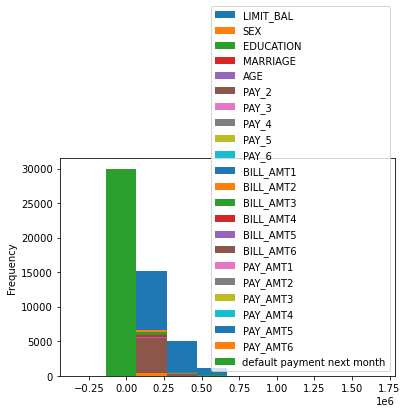

In [100]:
(df.plot.hist()['SEX','EDUCATION','MARRIAGE','AGE'])


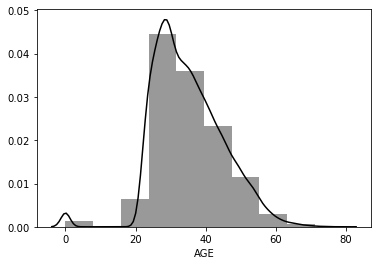

In [102]:
sns.distplot(df['AGE'],hist=True,kde=True,color='k',bins=10)

In [103]:
df.drop_duplicates(keep='first',inplace=True)
df.shape

(30000, 25)

# EXPLORING AND CLEANING

In [106]:
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [107]:
df_clean_1['PAY_1'].head(5)

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [108]:
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [109]:
valid_pay_1_mask = df_clean_1['PAY_1'] != 'Not available'
valid_pay_1_mask[0:5]

0    True
1    True
2    True
3    True
4    True
Name: PAY_1, dtype: bool

In [110]:
sum(valid_pay_1_mask)

26664

In [111]:
df_clean_2 = df_clean_1.loc[valid_pay_1_mask,:].copy()

In [112]:
df_clean_2.shape

(26664, 25)

In [113]:
df_clean_2['PAY_1'].value_counts()

 0    13087
-1     5047
 1     3261
-2     2476
 2     2378
 3      292
 4       63
 5       23
 8       17
 6       11
 7        9
Name: PAY_1, dtype: int64

In [114]:
df_clean_2['PAY_1'] = df_clean_2['PAY_1'].astype('int64')
df_clean_2[['PAY_1', 'PAY_2']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26664 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PAY_1   26664 non-null  int64
 1   PAY_2   26664 non-null  int64
dtypes: int64(2)
memory usage: 624.9 KB


In [115]:
import matplotlib.pyplot as plt #import plotting package
 
#render plotting automatically
%matplotlib inline
 
import matplotlib as mpl #additional plotting functionality
 
mpl.rcParams['figure.dpi'] = 400 #high resolution figures

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023EF05A73D0>,
      dtype=object)

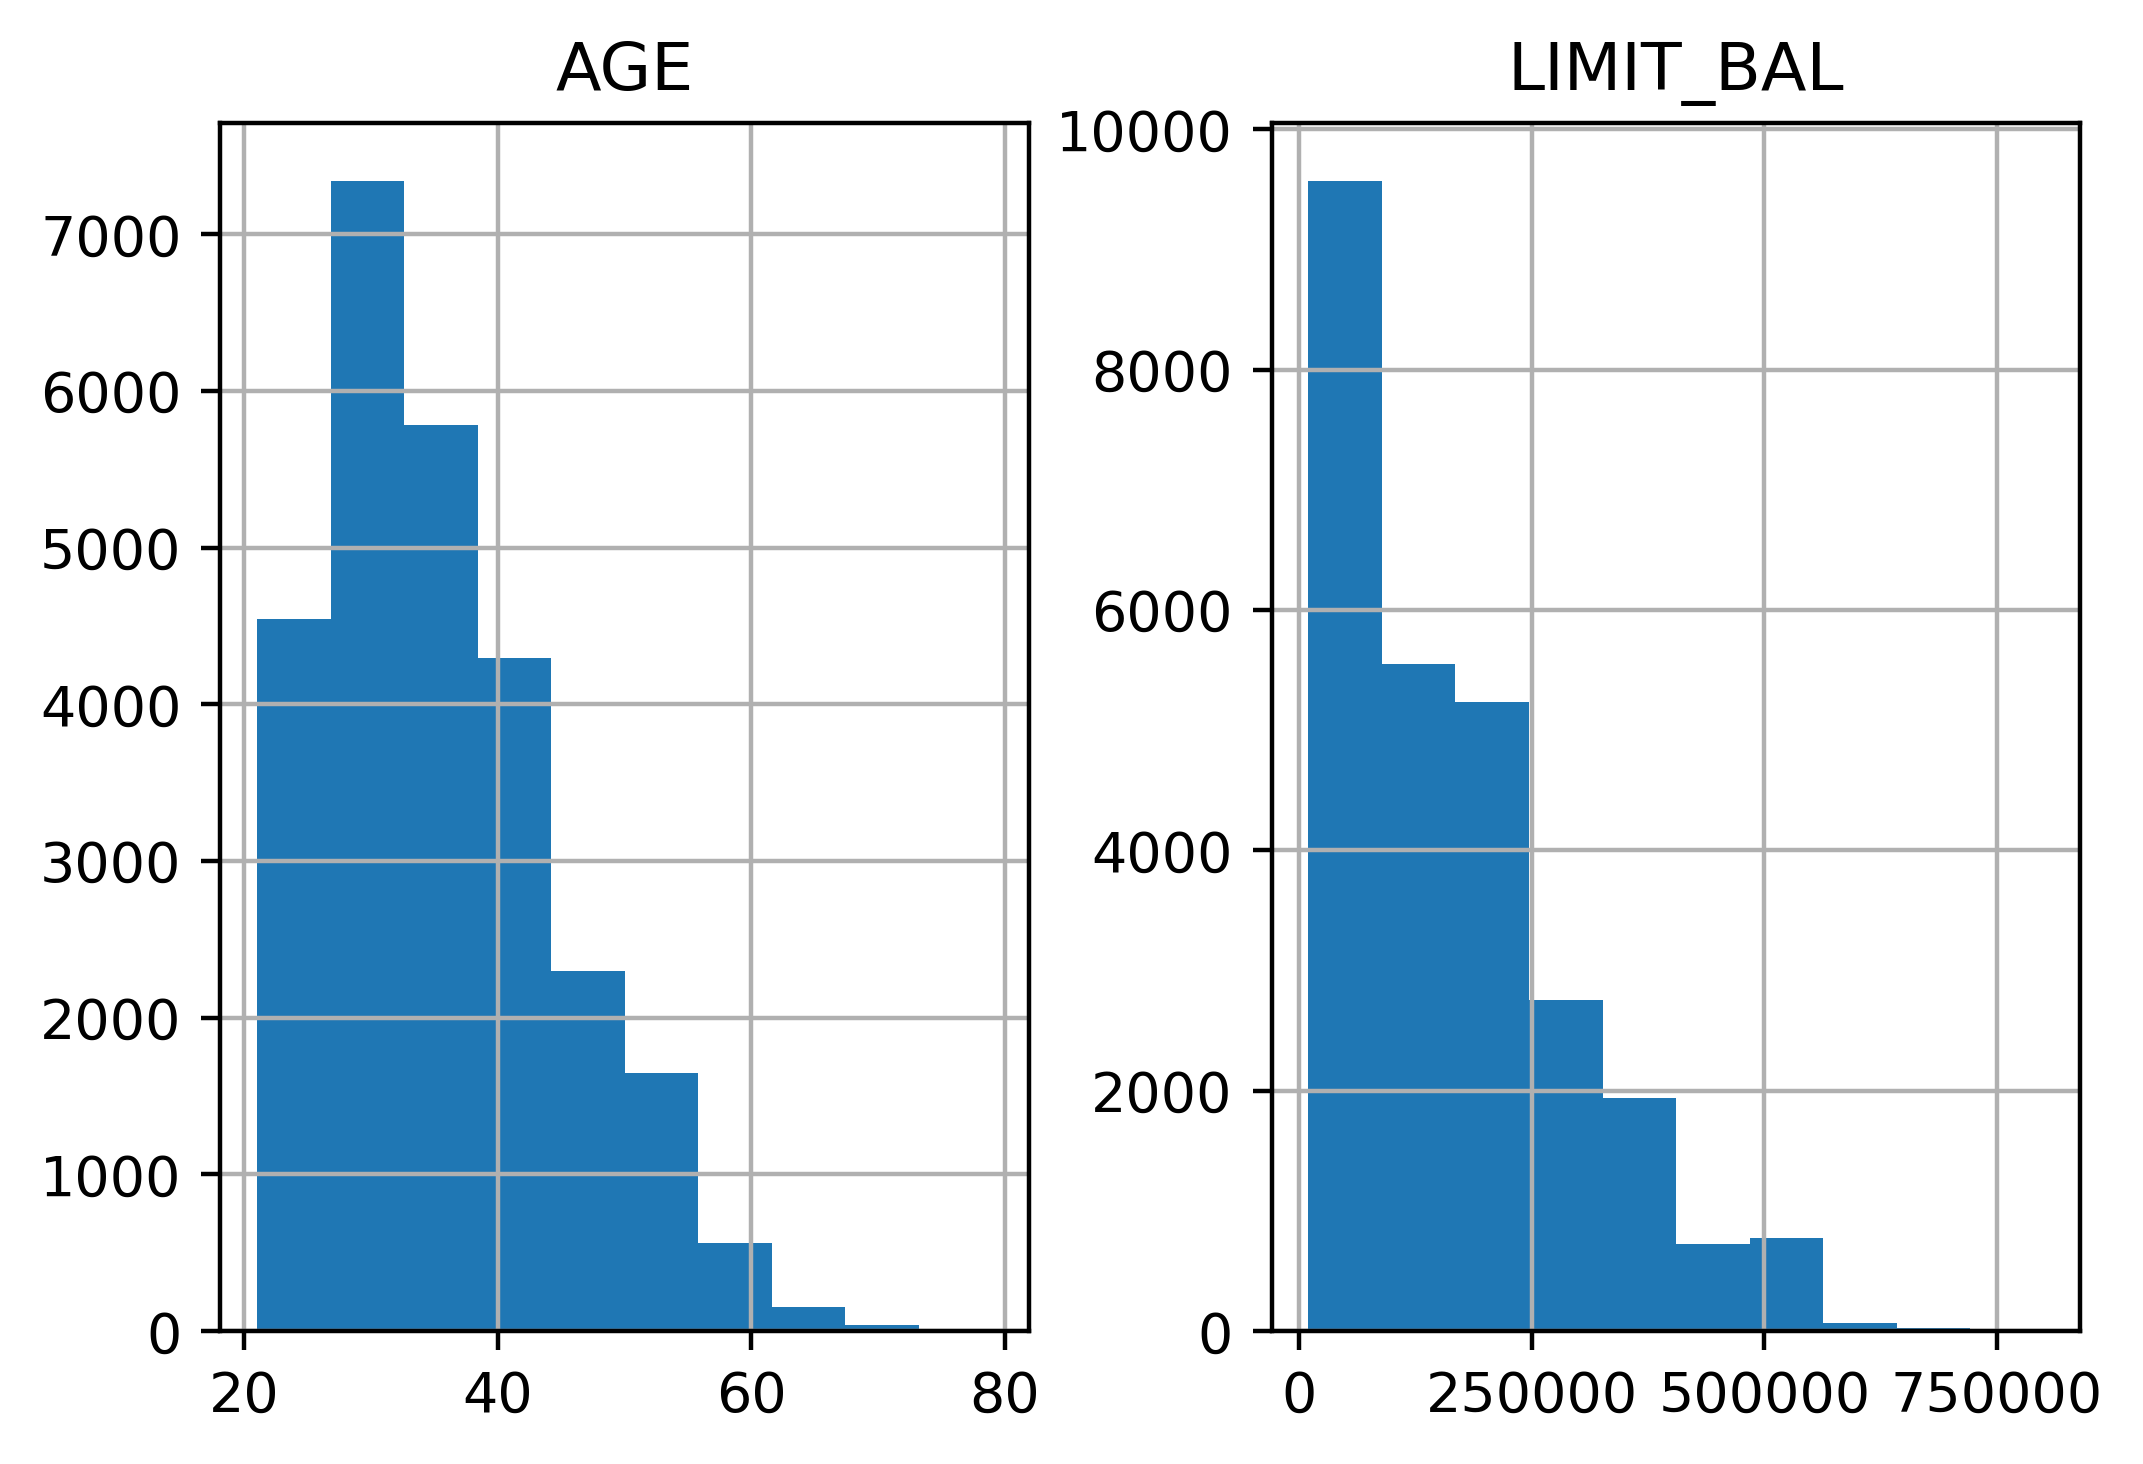

In [116]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

In [117]:
df_clean_2[['LIMIT_BAL', 'AGE']].describe()

,LIMIT_BAL,AGE
count,26664.000000,26664.000000
mean,167919.054905,35.505213
std,129839.453081,9.227442
min,10000.000000,21.000000
25%,50000.000000,28.000000
50%,140000.000000,34.000000
75%,240000.000000,41.000000
max,800000.000000,79.000000


In [118]:
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

In [119]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6], value=4, inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [120]:
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [121]:
df_clean_2['MARRIAGE'].replace(to_replace=0, value=3, inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

# Deep Dive: Categorical Features

Text(0.5, 0, 'Education level: ordinal encoding')

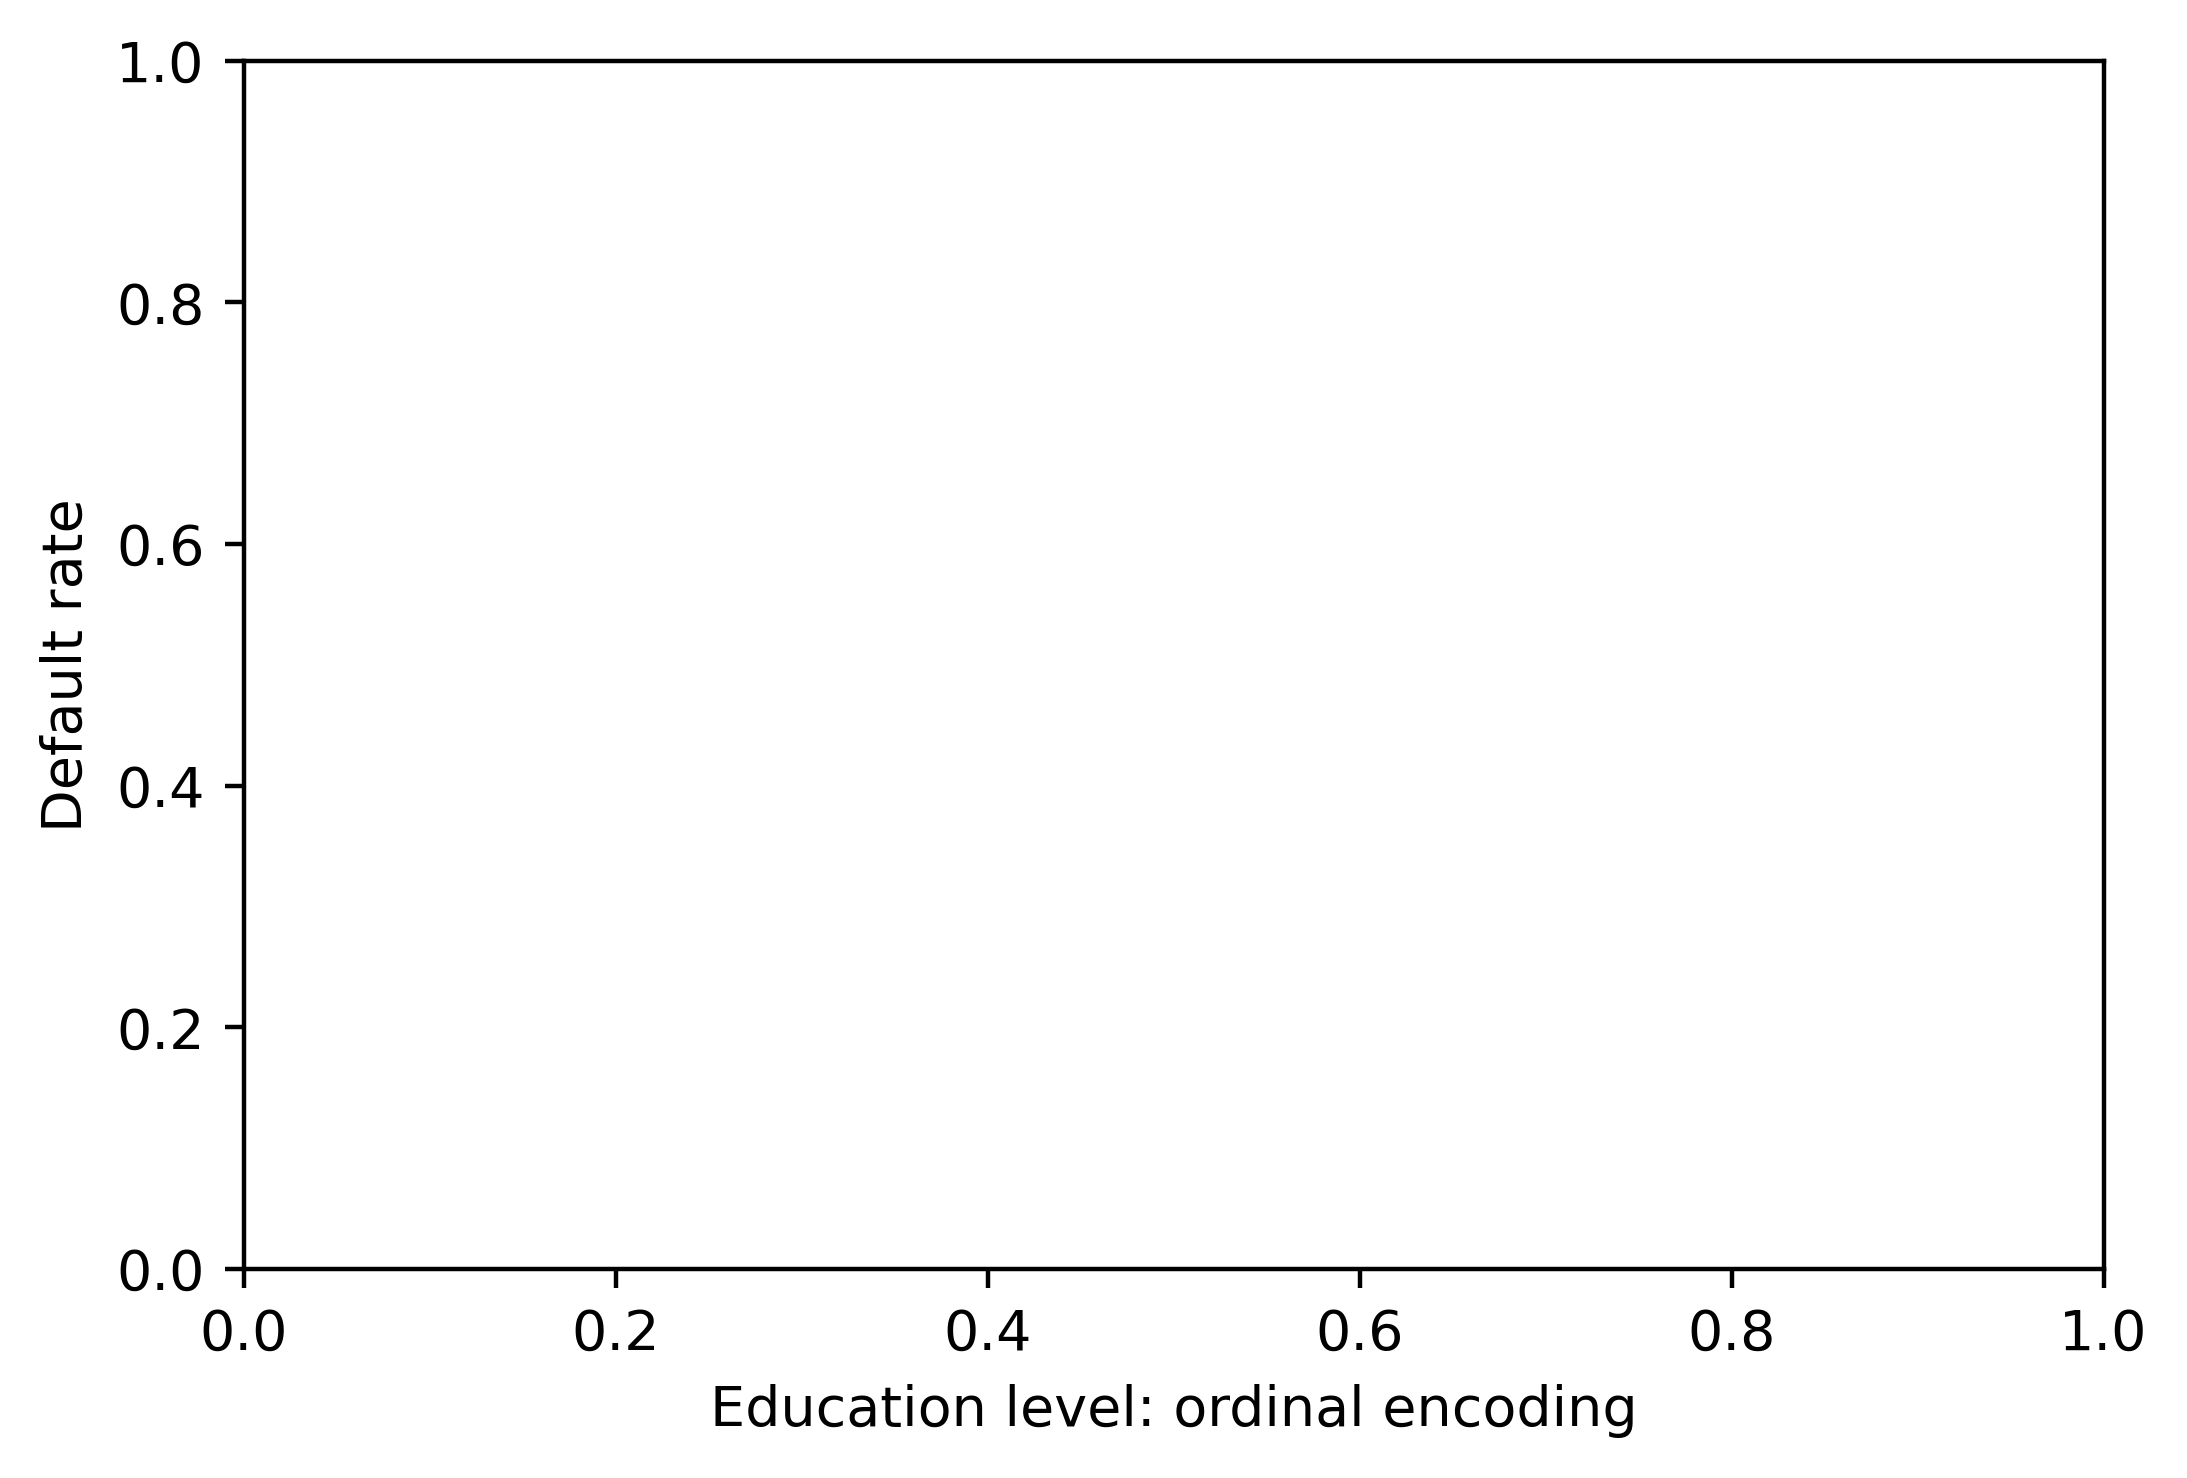

In [123]:
# df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education level: ordinal encoding')

# implementing OHE for a Categorical Feature

In [124]:
df_clean_2['EDUCATION_CAT'] = 'none'

In [125]:
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,none
1,2,none
2,2,none
3,2,none
4,2,none
5,1,none
6,1,none
7,2,none
8,3,none
9,3,none


In [126]:
cat_mapping = {
    1: "graduate school",
    2: "university",
    3: "high school",
    4: "others"
}

In [127]:
df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(cat_mapping)
df_clean_2[['EDUCATION', 'EDUCATION_CAT']].head(10)

,EDUCATION,EDUCATION_CAT
0,2,university
1,2,university
2,2,university
3,2,university
4,2,university
5,1,graduate school
6,1,graduate school
7,2,university
8,3,high school
9,3,high school


In [128]:
edu_ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
edu_ohe.head(10)

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
5,1,0,0,0
6,1,0,0,0
7,0,0,0,1
8,0,1,0,0
9,0,1,0,0


In [129]:
df_with_ohe = pd.concat([df_clean_2, edu_ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school',
             'high school', 'university', 'others']].head(10)

,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0


In [130]:
df_with_ohe.to_csv('cleaned_data.csv', index=False)

In [131]:
pay_feats = ['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

In [132]:
df[pay_feats].describe()

,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.132867,-0.164333,-0.219300,-0.263900,-0.288033
std,1.191215,1.191096,1.162348,1.127519,1.144981
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000


In [137]:
pay_1_bins = np.array(range(-2,10)) - 0.5
pay_1_bins

array([-2.5, -1.5, -0.5,  0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,
        8.5])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023EF0234670>,
      dtype=object)

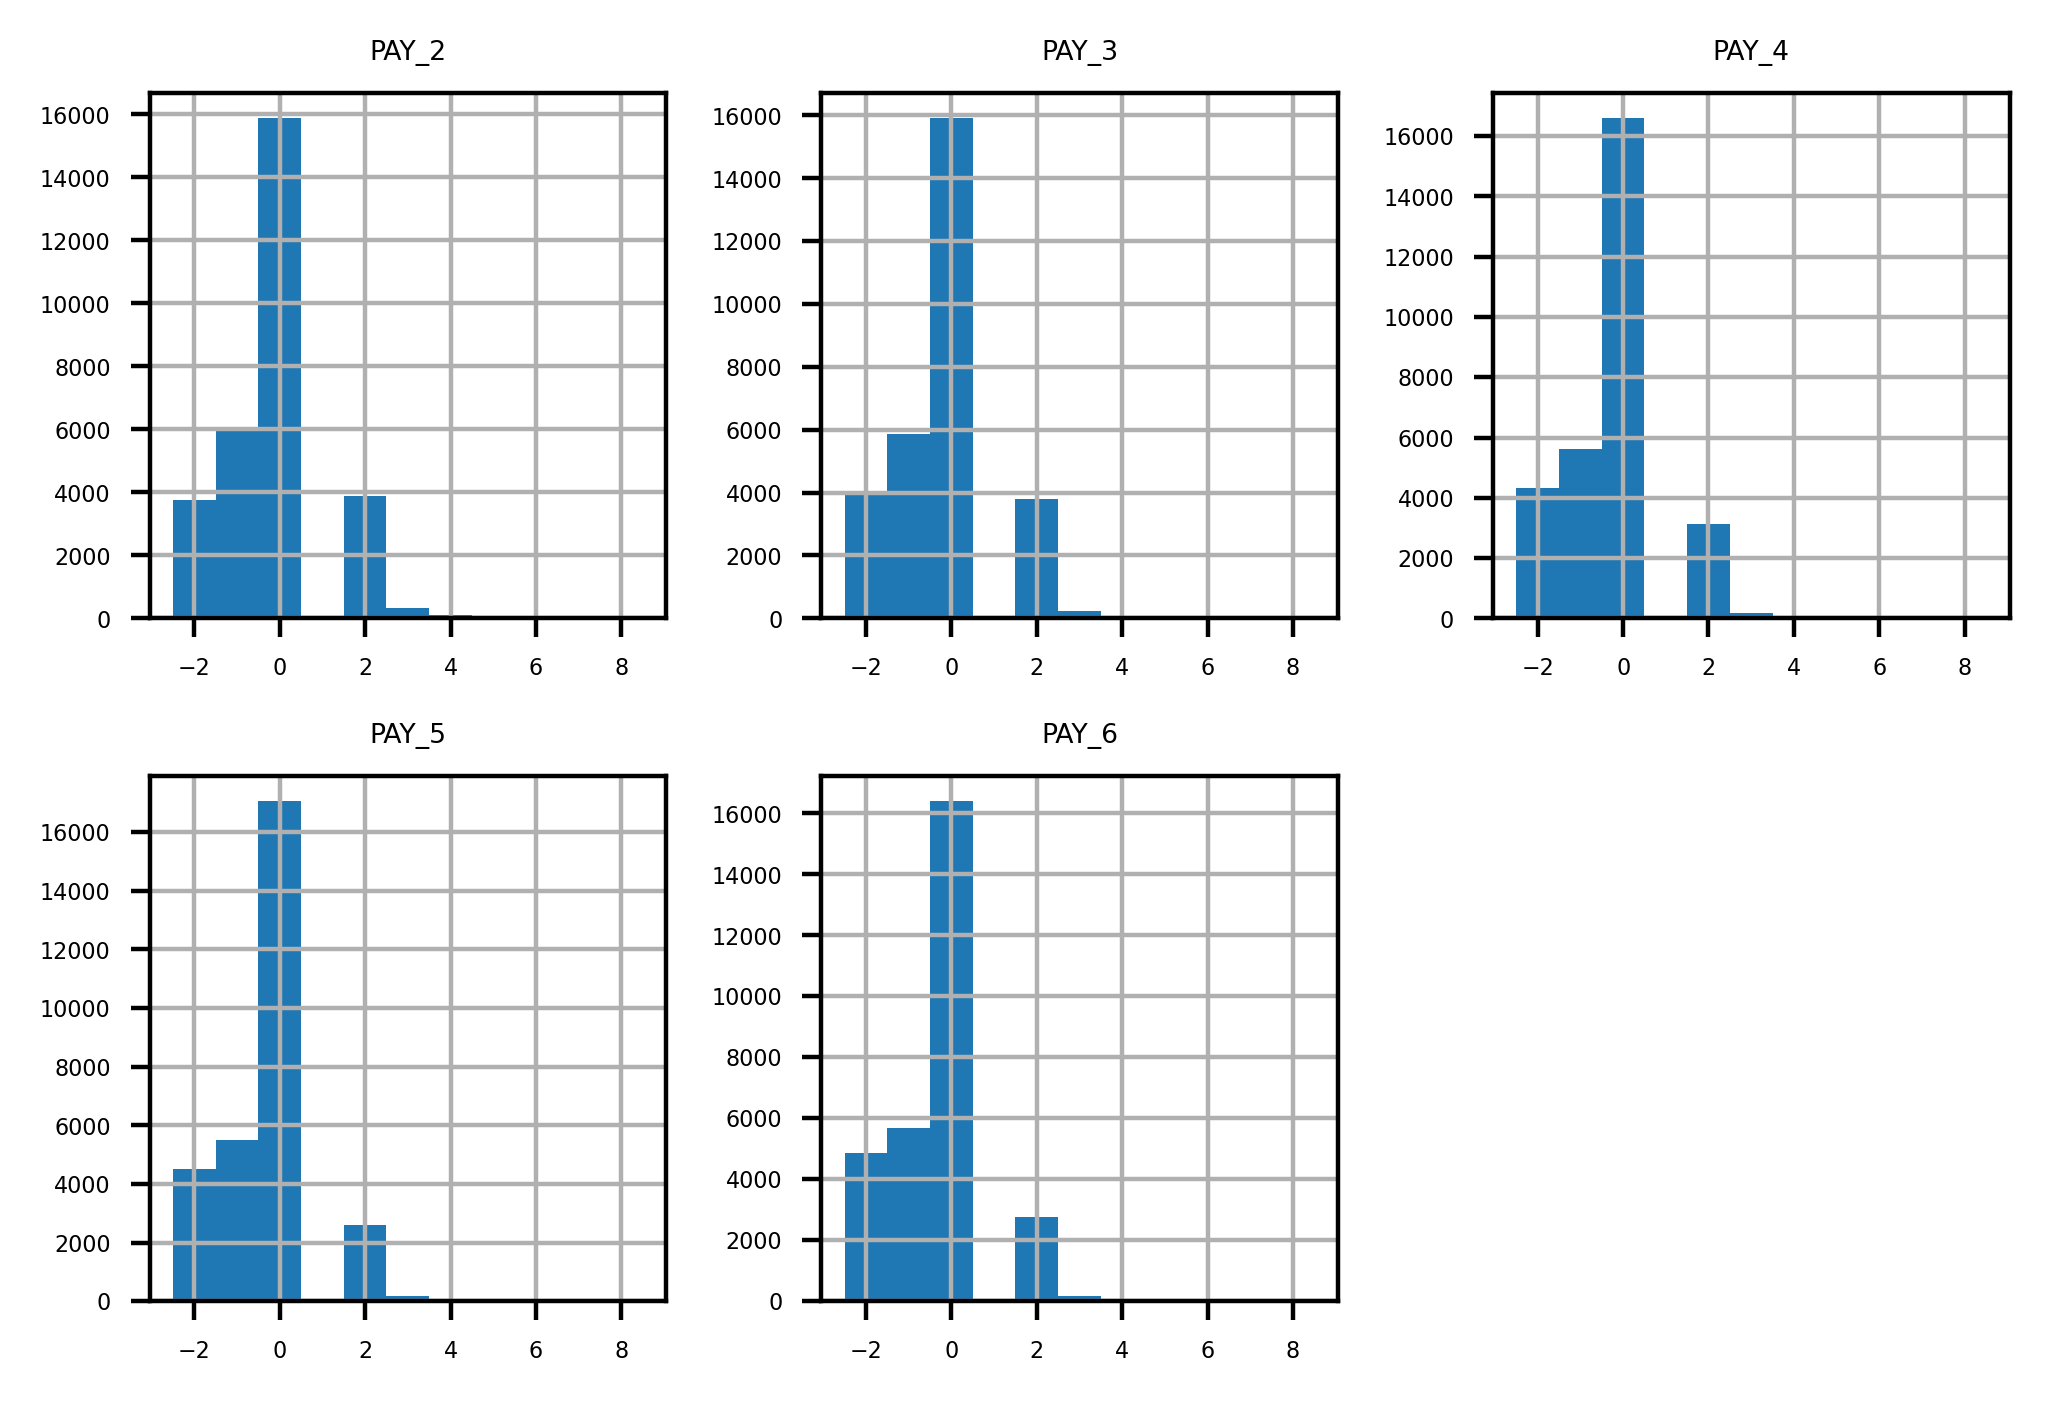

In [140]:
mpl.rcParams['font.size'] = 4
df[pay_feats].hist(bins=pay_1_bins, layout=(2,3))

In [141]:
df.loc[df['PAY_2']==2, ['PAY_2', 'PAY_3']].head()

,PAY_2,PAY_3
0,2,-1
1,2,0
13,2,2
15,2,0
50,2,2


# THANK YOU[TASK-1]